In [38]:
!pip install yfinance

In [39]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [40]:
start = datetime.datetime(2022,11,25)
end = datetime.datetime(2023,11,25)
ws = yf.download('RPOWER.NS',start,end)
ws['SMA30'] = ws['Close'].rolling(30).mean()

[*********************100%%**********************]  1 of 1 completed


In [41]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30
Date,,,,,,,
2022-11-25,15.300000,16.000000,15.20,16.000000,16.000000,12205093,NaN
2022-11-28,16.100000,16.250000,15.90,16.000000,16.000000,6728703,NaN
2022-11-29,16.049999,16.200001,15.70,15.900000,15.900000,7027568,NaN
2022-11-30,15.900000,16.400000,15.80,16.049999,16.049999,16777348,NaN
2022-12-01,16.100000,16.250000,15.85,16.000000,16.000000,7038436,NaN


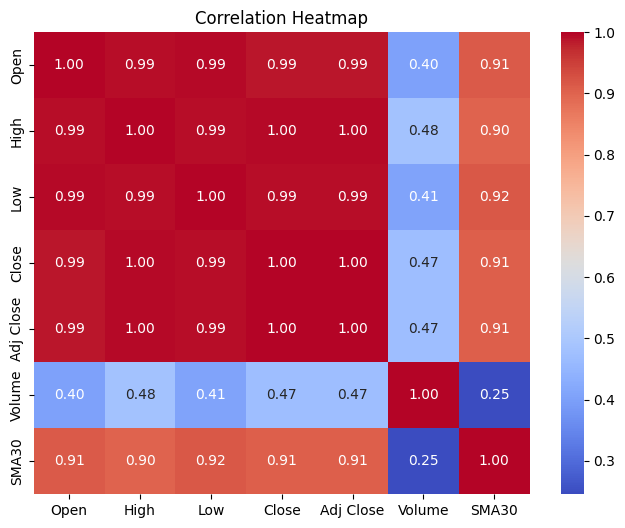

In [42]:
# Calculate the correlation matrix
correlation_matrix = ws.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")  # Optional: Set the title
# Display the heatmap
plt.show()

In [43]:

ws['Close'] = ws['Close'].round(2)
date = ws.index
ws['Underlying Log Returns (C)'] = np.log(ws['Close'] / ws['Close'].shift(1))
ws['Underlying Log Returns (C)'] = ws['Underlying Log Returns (C)'].round(4)
ws.index = range(len(ws))
ws.loc[0,'Previous Day Underlying Volatility (D)'] = 0.0372

index=1
print(ws.at[0, 'Previous Day Underlying Volatility (D)'])
print(ws.at[index-1,'Previous Day Underlying Volatility (D)'])
print(ws.at[1, 'Underlying Log Returns (C)'])

# Calculate 'Current Day Underlying Daily Volatility (E)' iteratively
for index in range(1, len(ws)):  # Start from index + 1
          # For the first row, the formula uses the initial 'Previous Day Underlying Volatility (D)'
          ws.at[index, 'Current Day Underlying Daily Volatility (E)'] = np.sqrt(0.995 * ws.at[index-1,'Previous Day Underlying Volatility (D)'] ** 2 + 0.005 * ws.at[index,'Underlying Log Returns (C)'] ** 2)
          # ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)'].round(4)
          ws.at[index, 'Previous Day Underlying Volatility (D)'] = ws.at[index, 'Current Day Underlying Daily Volatility (E)']
# Assuming df is your DataFrame
#ws = ws.drop(ws.index[-1])
ws.index=date
ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)']
ws = ws.iloc[1:]

0.0372
0.0372
0.0


In [44]:
ws.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2023-11-20,23.000000,23.200001,21.799999,22.10,22.10,130712010,18.983333,-0.0334,0.035598,0.035598
2023-11-21,22.200001,22.400000,21.049999,21.35,21.35,126666416,19.066667,-0.0345,0.035592,0.035592
2023-11-22,21.400000,21.450001,20.700001,20.90,20.90,118764772,19.168333,-0.0213,0.035535,0.035535
2023-11-23,21.100000,21.799999,20.950001,21.35,21.35,108417604,19.286667,0.0213,0.035478,0.035478
2023-11-24,21.400000,21.500000,20.700001,20.90,20.90,72667677,19.376667,-0.0213,0.035421,0.035421


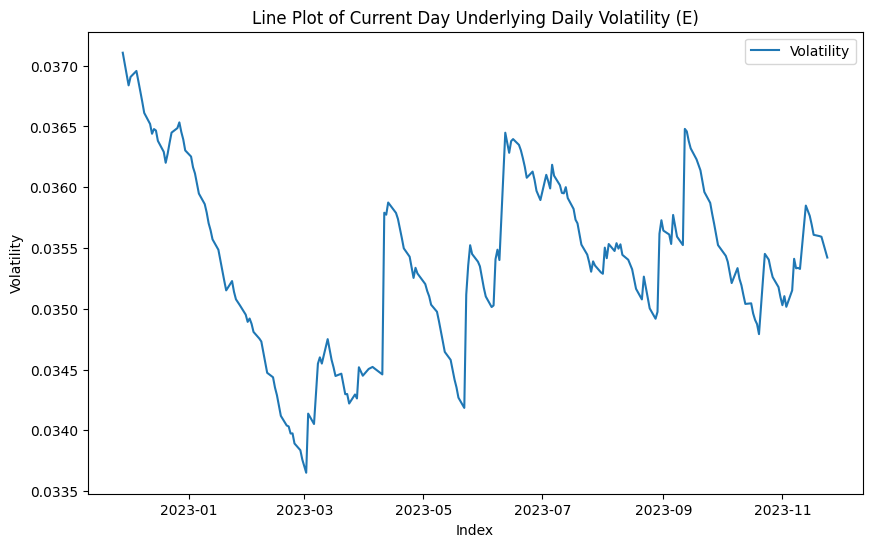

In [45]:
# Assuming you have your DataFrame 'ws' with the relevant data
# Create a line plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Line Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend

# Display the plot
plt.show()


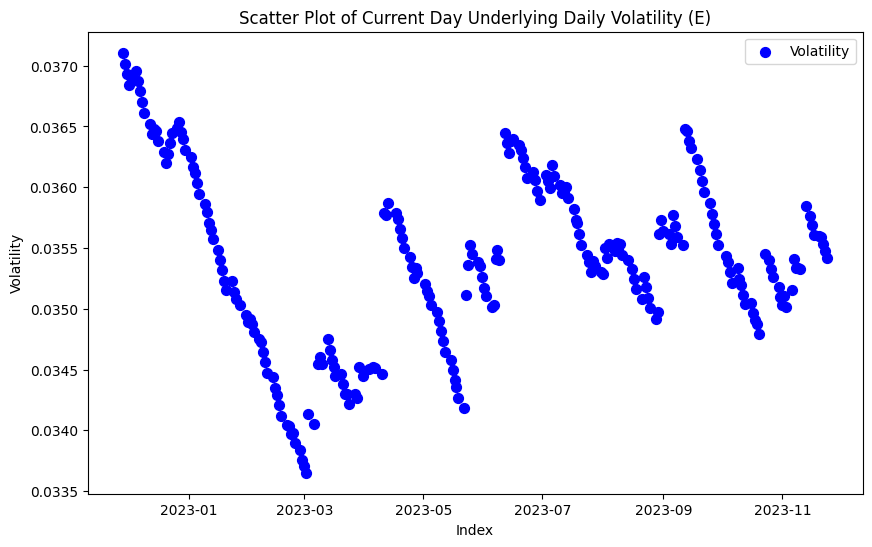

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'ws' with the relevant data

# Create a scatter plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility', marker='o', s=50, c='blue')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Scatter Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend
# Display the plot
plt.show()

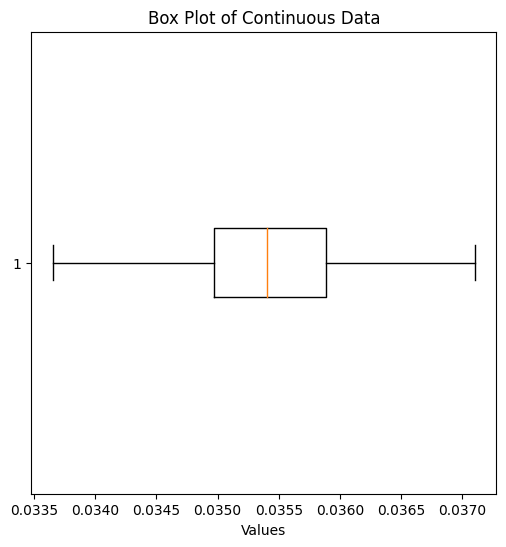

In [47]:
# Create a box plot
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.boxplot(ws['Current Day Underlying Daily Volatility (E)'], vert=False)  # Create a horizontal box plot (vert=False)
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.title('Box Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

<ipython-input-48-065e43bdf794>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading


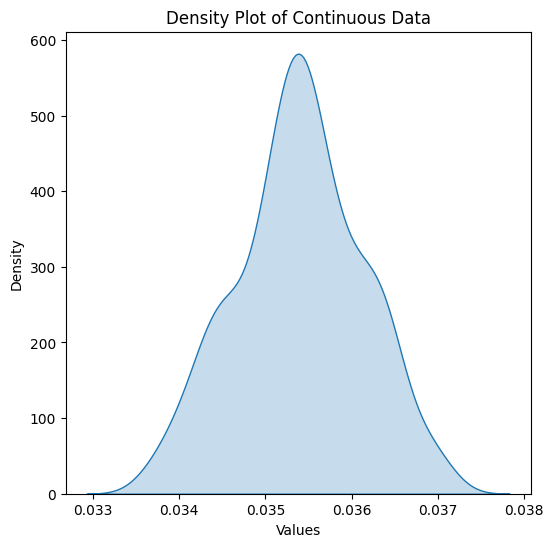

In [48]:
# Create a density plot (Kernel Density Estimation)
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.ylabel('Density')  # Optional: Set the y-axis label
plt.title('Density Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

In [49]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2022-11-28,16.100000,16.250000,15.90,16.00,16.000000,6728703,NaN,0.0000,0.037107,0.037107
2022-11-29,16.049999,16.200001,15.70,15.90,15.900000,7027568,NaN,-0.0063,0.037017,0.037017
2022-11-30,15.900000,16.400000,15.80,16.05,16.049999,16777348,NaN,0.0094,0.036930,0.036930
2022-12-01,16.100000,16.250000,15.85,16.00,16.000000,7038436,NaN,-0.0031,0.036838,0.036838
2022-12-02,15.950000,16.799999,15.65,16.80,16.799999,24401937,NaN,0.0488,0.036908,0.036908


In [50]:
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

In [51]:
last_x = x.iloc[-5:]
last_y = y.iloc[-5:]
x = x.iloc[:-5]
y = y.iloc[:-5]

In [52]:
last_x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-11-20,23.000000,23.200001,21.799999,22.10,22.10,130712010,-0.0334,0.035598
2023-11-21,22.200001,22.400000,21.049999,21.35,21.35,126666416,-0.0345,0.035592
2023-11-22,21.400000,21.450001,20.700001,20.90,20.90,118764772,-0.0213,0.035535
2023-11-23,21.100000,21.799999,20.950001,21.35,21.35,108417604,0.0213,0.035478
2023-11-24,21.400000,21.500000,20.700001,20.90,20.90,72667677,-0.0213,0.035421


In [53]:
last_y

Date
2023-11-20    0.035598
2023-11-21    0.035592
2023-11-22    0.035535
2023-11-23    0.035478
2023-11-24    0.035421
Name: Current Day Underlying Daily Volatility (E), dtype: float64

In [54]:
x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2022-11-28,16.100000,16.250000,15.900000,16.00,16.000000,6728703,0.0000,0.037107
2022-11-29,16.049999,16.200001,15.700000,15.90,15.900000,7027568,-0.0063,0.037017
2022-11-30,15.900000,16.400000,15.800000,16.05,16.049999,16777348,0.0094,0.036930
2022-12-01,16.100000,16.250000,15.850000,16.00,16.000000,7038436,-0.0031,0.036838
2022-12-02,15.950000,16.799999,15.650000,16.80,16.799999,24401937,0.0488,0.036908
...,...,...,...,...,...,...,...,...
2023-11-10,21.250000,21.650000,20.250000,20.50,20.500000,149791559,-0.0336,0.035328
2023-11-13,20.650000,22.750000,20.250000,22.50,22.500000,294553361,0.0931,0.035849
2023-11-15,22.850000,23.200001,22.049999,22.30,22.299999,158954240,-0.0089,0.035765


In [55]:
x.shape

(242, 8)

In [56]:

y.shape

(242,)

Polynomial regression

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_train=x_train.to_numpy().reshape(-1,1)
# print(x_train.shape)

(193, 8)
(49, 8)
(193,)
(49,)


In [58]:
x_test.dtypes

Open                                      float64
High                                      float64
Low                                       float64
Close                                     float64
Adj Close                                 float64
Volume                                      int64
Underlying Log Returns (C)                float64
Previous Day Underlying Volatility (D)    float64
dtype: object

In [59]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-02-28,10.000000,10.05,9.75,9.80,9.80,15580538,-0.0102,0.033759
2023-02-20,11.150000,11.20,10.75,10.95,10.95,11564588,-0.0091,0.034040
2023-09-01,19.299999,19.90,18.90,19.00,19.00,134930310,-0.0079,0.035643
2023-10-06,18.950001,19.10,18.75,18.85,18.85,26043912,-0.0026,0.035212
2023-05-10,12.050000,12.10,11.85,11.90,11.90,13335218,-0.0084,0.034817


In [60]:
poly = PolynomialFeatures(degree=8)#on degree 1 it gives exact values on 2 less accurate and 3 may be a sort of best fit to the algorithm
X_poly = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)
X_poly_testf = poly.fit_transform(last_x)
poly.fit(X_poly,y_train)
lin2=LinearRegression()
lin2.fit(X_poly,y_train)

LinearRegression()

In [61]:
y_pred=lin2.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)

Mean Squared Error: 5.577679740472027e-07
Mean aboslute Error: 0.0005952026696035793
Mean absolute percentage Error: 0.01699811014956304


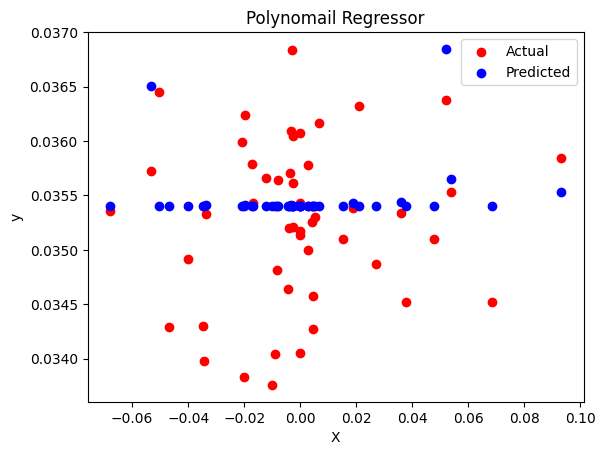

In [62]:
xtes=x_test['Underlying Log Returns (C)']
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Polynomail Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [63]:
print(y_pred[:10])


[0.03540374 0.03540374 0.03540743 0.03540374 0.03540374 0.03553224
 0.03540432 0.03540374 0.03540374 0.03540374]


In [64]:
print(x_test[:10])

                 Open   High        Low  Close  Adj Close     Volume  \
Date                                                                   
2023-02-28  10.000000  10.05   9.750000   9.80       9.80   15580538   
2023-02-20  11.150000  11.20  10.750000  10.95      10.95   11564588   
2023-09-01  19.299999  19.90  18.900000  19.00      19.00  134930310   
2023-10-06  18.950001  19.10  18.750000  18.85      18.85   26043912   
2023-05-10  12.050000  12.10  11.850000  11.90      11.90   13335218   
2023-11-13  20.650000  22.75  20.250000  22.50      22.50  294553361   
2023-07-05  14.550000  14.80  14.300000  14.35      14.35  101420478   
2023-10-05  18.950001  19.10  18.549999  18.90      18.90   43782204   
2023-11-02  17.600000  18.35  17.350000  18.25      18.25   77875784   
2023-03-27   9.900000   9.95   9.300000   9.40       9.40   22690733   

            Underlying Log Returns (C)  Previous Day Underlying Volatility (D)  
Date                                                  

In [65]:
y_pred=lin2.predict(X_poly_testf)
print(y_pred.round(4))

[0.0354 0.0354 0.0354 0.0354 0.0354]


2.KNN Regressor

Mean Squared Error: 5.416679742744806e-07
Mean aboslute Error: 0.0005625470920089248
Mean absolute percentage Error: 0.016091394915431247


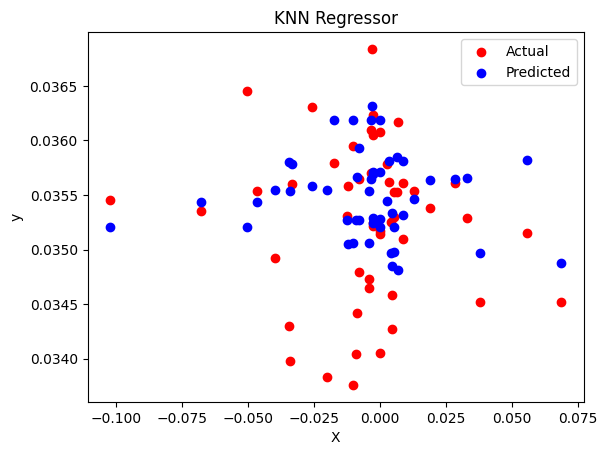

In [66]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create KNN regressor object
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('KNN Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3.SVM REGRESSOR

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.08688763754446382, 'epsilon': 1.6941252960369346, 'C': 881.059475041006}
Mean Squared Error: 5.180482774156812e-07
Mean aboslute Error: 0.0005587045068016795
Mean absolute percentage Error: 0.01596049394465457
Mean Squared Error with Best Hyperparameters: 5.180482774156812e-07


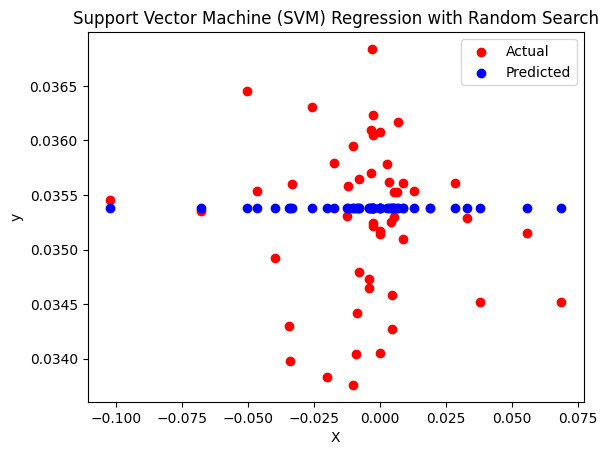

In [67]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Define the parameter grid for random search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.random.rand(20) * 1000,
    'gamma': np.random.rand(20) * 10,
    'epsilon': np.random.rand(20) * 2
}

# Create SVR object
svr = SVR()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid,
                                  scoring='neg_mean_squared_error', cv=5, n_iter=100)

random_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Apply the best hyperparameters to SVR
best_svr = SVR(**best_params)

# Fit the model on the training data with the best hyperparameters
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print(f'Mean Squared Error with Best Hyperparameters: {mse}')

xtes = X_test['Underlying Log Returns (C)']

# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Support Vector Machine (SVM) Regression with Random Search')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


4.ARIMA (AutoRegressive Integrated Moving Average)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 2.337745909401129e-05
Mean aboslute Error: 0.0012830397953441908
Mean absolute percentage Error: 0.03737267534837939
Mean Squared Error: 2.337745909401129e-05
(50, 7)
(50,)


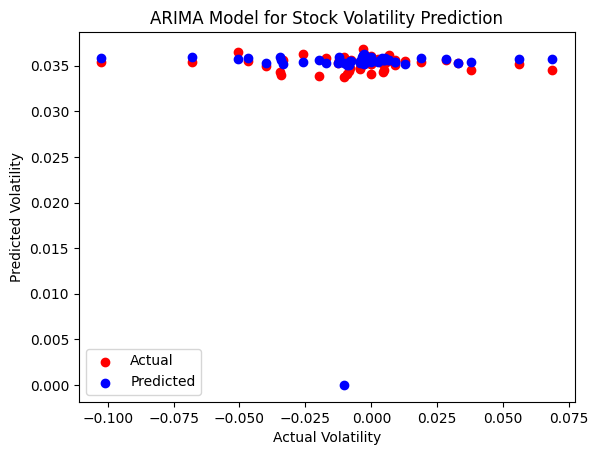

In [68]:
import statsmodels.api as sm

# Prepare the data for ARIMA
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)']]
y = ws['Current Day Underlying Daily Volatility (E)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# Fit the ARIMA model
arima_model = sm.tsa.arima.ARIMA(y_train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Make predictions on the test data
y_pred = arima_model_fit.predict(start=0, end=len(x_test)-1)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print("Mean Squared Error:", mse)
print(x_test.shape)
print(y_test.shape)
xtes=x_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('ARIMA Model for Stock Volatility Prediction')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.legend()
plt.show()


In [69]:
print(y_test.shape)
print(y_pred.shape)

(50,)
(50,)


5.Random forest regressor

Mean Squared Error: 9.192554679109095e-10
Mean aboslute Error: 1.6813340403946804e-05
Mean absolute percentage Error: 0.00047853238663526546


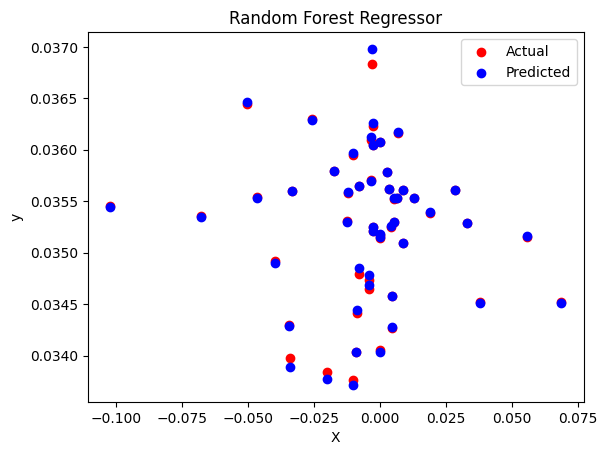

In [70]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


6.LSTM

In [71]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)



Epoch 1/100
7/7 [==============================] - 4s 18ms/step - loss: 3.5909e-04
Epoch 2/100
7/7 [==============================] - 0s 32ms/step - loss: 7.6703e-05
Epoch 3/100
7/7 [==============================] - 0s 30ms/step - loss: 4.4097e-05
Epoch 4/100
7/7 [==============================] - 0s 34ms/step - loss: 7.8825e-06
Epoch 5/100
7/7 [==============================] - 0s 33ms/step - loss: 3.3150e-06
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 7.0970e-06
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 2.6712e-06
Epoch 8/100
7/7 [==============================] - 0s 28ms/step - loss: 1.1809e-06
Epoch 9/100
7/7 [==============================] - 0s 29ms/step - loss: 1.5840e-06
Epoch 10/100
7/7 [==============================] - 0s 24ms/step - loss: 6.2545e-07
Epoch 11/100
7/7 [==============================] - 0s 22ms/step - loss: 5.3660e-07
Epoch 12/100
7/7 [==============================] - 0s 27ms/step - loss: 4.3431e-07
E

Mean Squared Error: 1.3959914531453993e-08
Mean aboslute Error: 9.34466242170183e-05
Mean absolute percentage Error: 0.002661572072515294
(50,)
(50,)


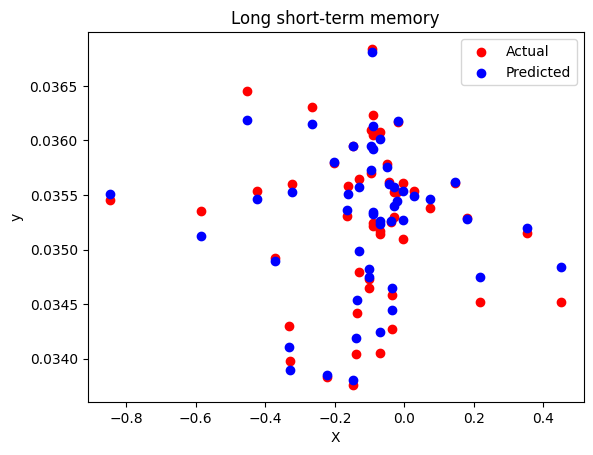

In [72]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Long short-term memory')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

7.RNN

In [73]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(64), return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(32)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/100
7/7 [==============================] - 4s 13ms/step - loss: 0.1662
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0548
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0235
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0081
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0032
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 9/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0010
Epoch 10/100
7/7 [==============================] - 0s 17ms/step - loss: 9.5723e-04
Epoch 11/100
7/7 [==============================] - 0s 14ms/step - loss: 7.6513e-04
Epoch 12/100
7/7 [==============================] - 0s 16ms/step - loss: 5.6130e-04
Epoch 13/100
7/7 [===================

Mean Squared Error: 4.648301347529946e-05
Mean aboslute Error: 0.005646140368464024
Mean absolute percentage Error: 0.1601790299329843
(50,)
(50,)


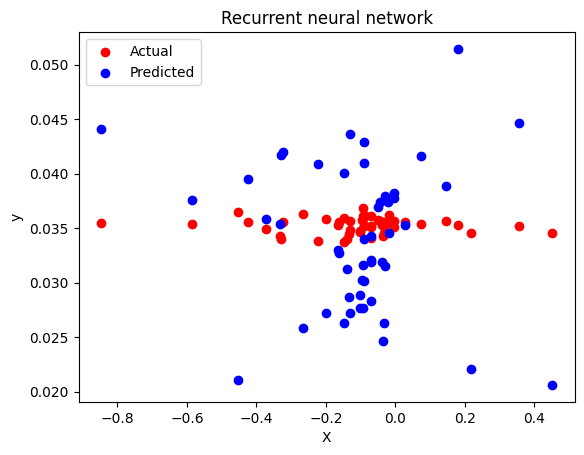

In [74]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Recurrent neural network')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()